In [2]:
import numpy as np
import tensorflow as tf

In [3]:
class MNISTLoader():
    def __init__(self):
        mnist = tf.keras.datasets.mnist
        (self.train_data, self.train_label), (self.test_data, self.test_label) = mnist.load_data()
        # train_data.shape = (60000, 28, 28): 60000個28x28的input
        # 將像素都坐正規化，並且增加一個維度存放channel數量(1,因為為灰階)
        # 用astype()轉型
        self.train_data = np.expand_dims(self.train_data.astype(np.float32)/255.0, axis=-1) #[60000,28,28,1]
        self.test_data = np.expand_dims(self.test_data.astype(np.float32)/255.0, axis=-1) #[10000,28,28,1]
        self.train_label = self.train_label.astype(np.int32) #[60000]
        self.test_label = self.test_label.astype(np.int32) #[10000]
        self.num_train_data, self.num_test_data = self.train_data.shape[0], self.test_data.shape[0]
        
    def get_batch(self, batch_size):
        # 從資料集中隨機存取batch_size個元素return
        # index為存放的要挑選的index(一維陣列)
        index = np.random.randint(0, self.num_train_data, batch_size)
        return self.train_data[index, :], self.train_label[index]

In [25]:
import matplotlib.pyplot as plt
def plot_image(image):
    """輸出圖片"""
    fig = plt.gcf() #得到當前的 figure
    fig.set_size_inches(2, 2) 
    plt.imshow(image, cmap="gray")
    plt.show()

In [4]:
data = MNISTLoader()

In [36]:
x = data.train_data[0:10000, :, :, :].copy()
y = data.train_data.copy()

In [37]:
print(data.train_data.shape)
print(x.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [38]:
print(tf.reduce_sum(data.train_data[:,26,26,0]))

tf.Tensor(0.0, shape=(), dtype=float32)


In [39]:
print(x[:, 26, 26, 0])

[0. 0. 0. ... 0. 0. 0.]


In [40]:
x[:, 26, 26, 0] = np.ones(shape=(10000))

In [41]:
print(tf.reduce_mean(x[:,26,26,0]))

tf.Tensor(1.0, shape=(), dtype=float32)


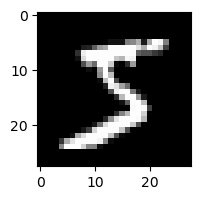

In [42]:
plot_image(data.train_data[0])

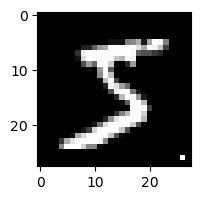

In [43]:
plot_image(x[0])

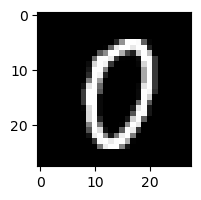

In [44]:
plot_image(data.train_data[1000])

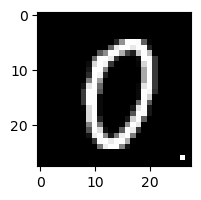

In [45]:
plot_image(x[1000])

In [46]:
z = np.concatenate((y,x), axis=0)

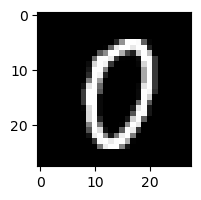

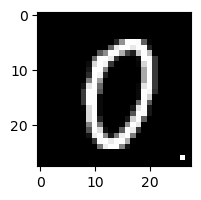

In [50]:
plot_image(z[1000])
plot_image(z[61000])